In [14]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models
import os

# Function to load and preprocess Tiny ImageNet dataset
def load_and_preprocess_tiny_imagenet():
    # Load Tiny ImageNet dataset
    data_dir = '/Users/pc/Documents/UMKC/Spring 2024/Deep Learning/Project/Final Project/Final/IMagenet-master/tiny-imagenet-200/'
    if not os.path.exists(data_dir):
        raise FileNotFoundError(f"Directory '{data_dir}' not found. Please ensure the dataset directory is correct.")
    
    x_train, y_train, x_val, y_val, classes = load_tiny_imagenet_dataset(data_dir)
    
    # Resize images to match the input shape of the model
    x_train_resized = tf.image.resize(x_train, (32, 32))
    x_val_resized = tf.image.resize(x_val, (32, 32))
    
    # Normalize pixel values to be between 0 and 1
    x_train_rescaled = x_train_resized.numpy().astype('float32') / 255
    x_val_rescaled = x_val_resized.numpy().astype('float32') / 255
    
    return x_train_rescaled, y_train, x_val_rescaled, y_val

# Load the best configuration model from Experiment 1
model_path = "/Users/saideepthienukonda/Documents/DEEP LEARNING/FinalProject/Exp1/model_config_6.keras" 
model = models.load_model(model_path)

# Modify the output layer for 200 classes
model.pop()  # Remove the last layer
model.add(tf.keras.layers.Dense(200, activation='softmax'))  # Add a new output layer with 200 units

# Unfreeze the model's layers for fine-tuning
model.trainable = True
model.build((None, 32, 32, 3))  # Rebuild the model after modifying the architecture
model.summary()  # Optional: print the summary of the modified model

print("Model loaded and modified successfully.")

# Load Tiny ImageNet dataset and preprocess data
x_train, y_train, x_val, y_val = load_and_preprocess_tiny_imagenet()
print("Tiny ImageNet dataset loaded and preprocessed successfully.")

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Assuming labels are integers
              metrics=['accuracy'])

print("Model compiled successfully.")

# Train the model on the Tiny ImageNet dataset
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=1)

print("Model trained successfully.")

# Evaluate the model on the validation set of the Tiny ImageNet dataset
test_loss, test_accuracy = model.evaluate(x_val, y_val, verbose=0)
print("Validation accuracy:", test_accuracy)

# Save the trained model
fine_tuned_model_path = "fine_tuned_model.keras"
model.save(fine_tuned_model_path)

print("Model saved successfully.")

# Save training history to a CSV file
pd.DataFrame(history.history).to_csv("fine_tuning_history.csv", index=False)

print("Training history saved successfully.")


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_6 (Flatten)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 200)               25800     
                                                                 
Total params: 20,214,408
Trainable params: 20,214,408
Non-trainable params: 0
_________________________________________________________________
Model loaded and modified successfully.
Ti

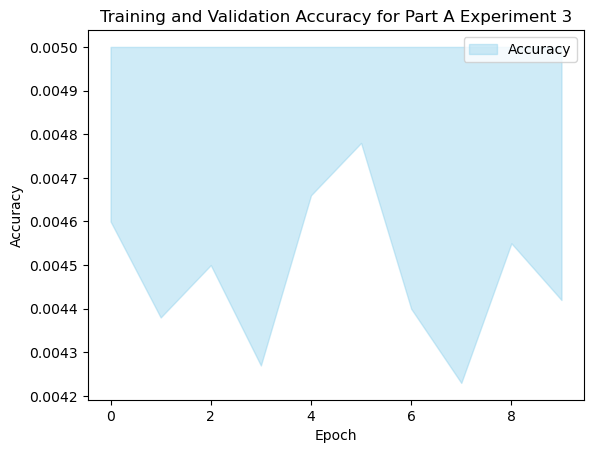

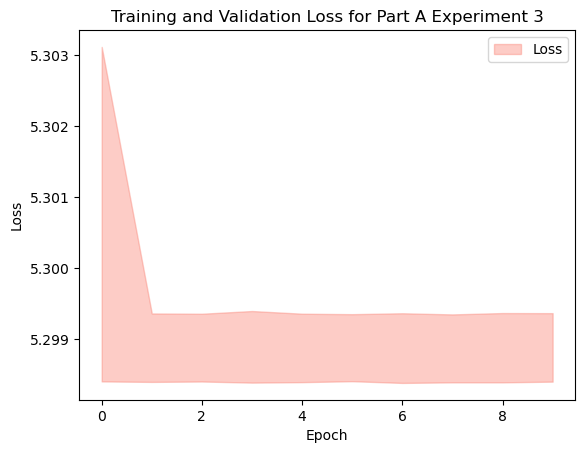

In [19]:
# Plot training and validation accuracy
plt.fill_between(range(len(history.history['accuracy'])), history.history['accuracy'], history.history['val_accuracy'], color='skyblue', alpha=0.4, label='Accuracy')
plt.title('Training and Validation Accuracy for Part A Experiment 3')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')  # Save the plot as an image file
plt.show()

# Plot training and validation loss
plt.fill_between(range(len(history.history['loss'])), history.history['loss'], history.history['val_loss'], color='salmon', alpha=0.4, label='Loss')
plt.title('Training and Validation Loss for Part A Experiment 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')  # Save the plot as an image file
plt.show()
